# Thông tin

1.MSSV: 20520435

2.Họ tên: Nguyễn Duy Đạt

3.Bài tập: 7

4.Ngày thực hiện: 13/5/2022

# 1.Xác định và hiển thị các điểm interest/key points của các cặp ảnh sau:

• cow1.jpg và cow2.jpg

• match1.jpg và match2.jpg

• graf_img1.jpg và graf_img5.jpg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap7/images/"

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap7/images


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
!pip install opencv-python==4.5.5.64
!pip install opencv-contrib-python==4.5.5.64

In [ ]:
def _drawKeyPoint(img):
  img = cv.imread(img ,cv.IMREAD_COLOR)
    
  # Converting image to grayscale
  gray= cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
  # Applying SIFT detector
  sift = cv.xfeatures2d.SIFT_create() 
  kp = sift.detect(gray, None)
    
  # Marking the keypoint on the image using circles
  img=cv.drawKeypoints(gray ,
                        kp ,
                        img ,
                        flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  plt.imshow(img), plt.show()

## a) cow1.jpg và cow2.jpg

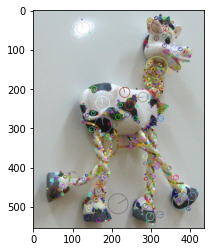

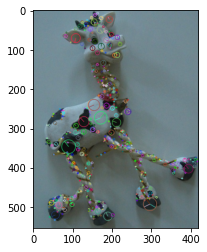

In [ ]:
_drawKeyPoint('cow1.jpg')
_drawKeyPoint('cow2.jpg')

## b) match1.jpg và match2.jpg

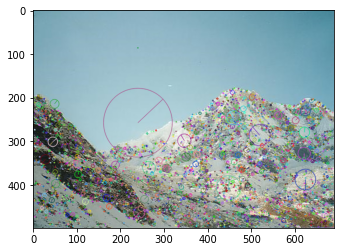

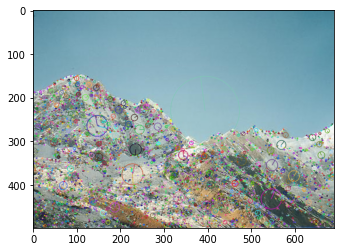

In [ ]:
_drawKeyPoint('match1.jpg')
_drawKeyPoint('match2.jpg')

## c) graf_img1.jpg và graf_img5.jpg

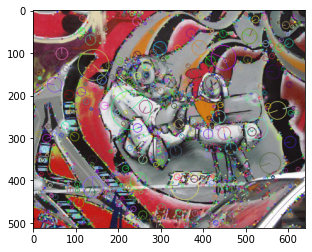

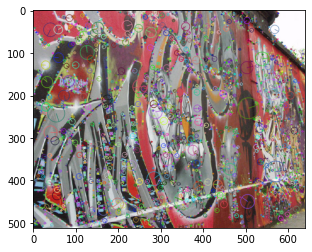

In [ ]:
_drawKeyPoint('graf_img1.jpg')
_drawKeyPoint('graf_img5.jpg')

# 2.Vẽ hình minh họa kết quả xác định các keypoints và descriptor cho các ảnh:

butterfly.jpg, home.jpg, simple.jpg

• Với các phương pháp:

   + BRIEF và ORB

## Thực hiện với ORB

In [ ]:
def _drawKeyPointORB(img):
  img = cv.imread(img ,cv.IMREAD_COLOR)

  # Initiate ORB detector
  orb = cv.ORB_create()

  # find the keypoints with ORB
  kp = orb.detect(img, None)

  # compute the descriptors with ORB
  kp, des = orb.compute(img, kp)

  # draw only keypoints location,not size and orientation
  img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
  plt.imshow(img2), plt.show()

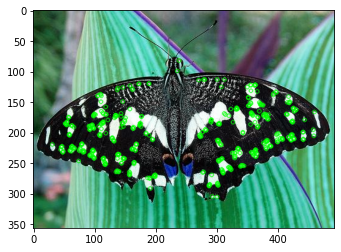

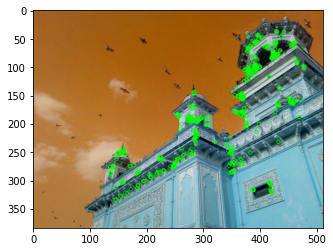

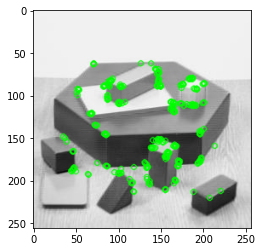

In [ ]:
_drawKeyPointORB('butterfly.jpg')
_drawKeyPointORB('home.jpg')
_drawKeyPointORB('simple.jpg')

## Thực hiện với BRIEF

In [ ]:
def _drawKeyPointBRIEF(img):
  img = cv.imread(img ,cv.IMREAD_COLOR)

  # Initiate FAST detector
  star = cv.xfeatures2d.StarDetector_create()
  # Initiate BRIEF extractor
  brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
  # find the keypoints with STAR
  kp = star.detect(img, None)
  # compute the descriptors with BRIEF
  kp, des = brief.compute(img, kp)
  img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
  plt.imshow(img2), plt.show()

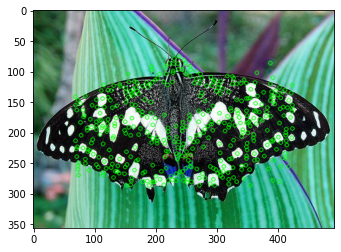

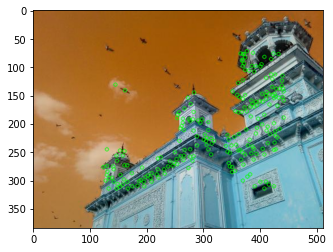

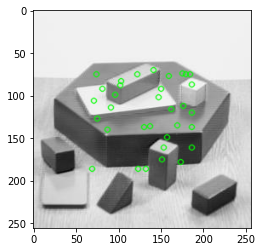

In [ ]:
_drawKeyPointBRIEF('butterfly.jpg')
_drawKeyPointBRIEF('home.jpg')
_drawKeyPointBRIEF('simple.jpg')

# 3.Feature Matching

• Brute-Force Matching with BRIEF/ORB Descriptors

• FLANN with BRIEF/ORB Descriptors

Cho ảnh: left.jpg và right.jpg

In [ ]:
# ORB -> opt = 0
# FRIEF -> opt = 1
def _bruteForceMatching(img1, img2, opt = 0):  
  img1 = cv.imread(img1 ,cv.IMREAD_COLOR)  # queryImage
  img2 = cv.imread(img2 ,cv.IMREAD_COLOR) # trainImage
  
  if opt == 0:
    # Initiate ORB detector
    orb = cv.ORB_create()
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
  else: 
    # Initiate Brief detector
    start = cv.xfeatures2d.StarDetector_create()
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

    kp1 = start.detect(img1, None)
    kp1, des1 = brief.compute(img1, kp1)

    kp2 = start.detect(img2, None)
    kp2, des2 = brief.compute(img2, kp2)

  # create BFMatcher object
  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  # Match descriptors.
  matches = bf.match(des1,des2)
  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)
  # Draw first 10 matches.
  img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.figure(figsize=(20, 20))
  plt.imshow(img3),plt.show()

Brute-Force Matching with ORB Descriptors


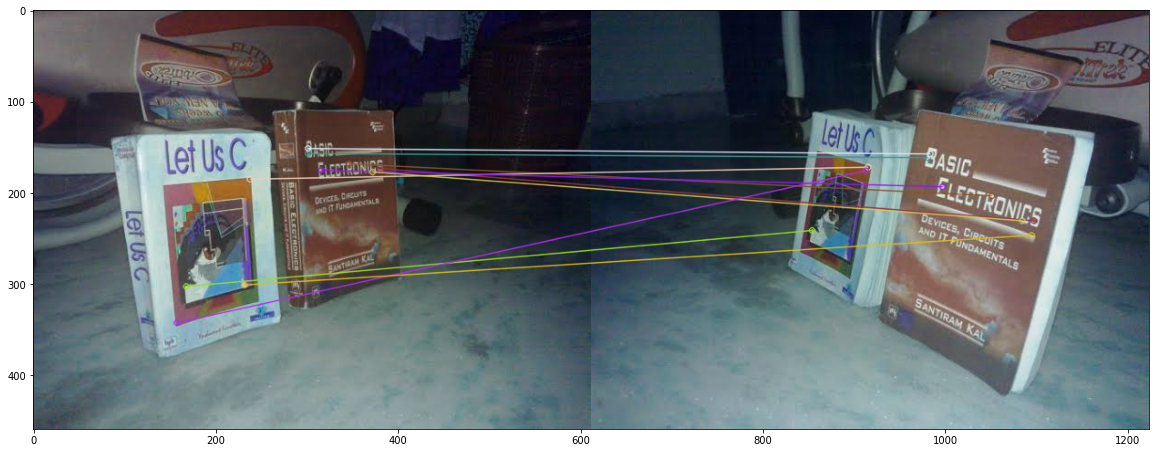

-----------------------------------------------
Brute-Force Matching with BRIEF Descriptors


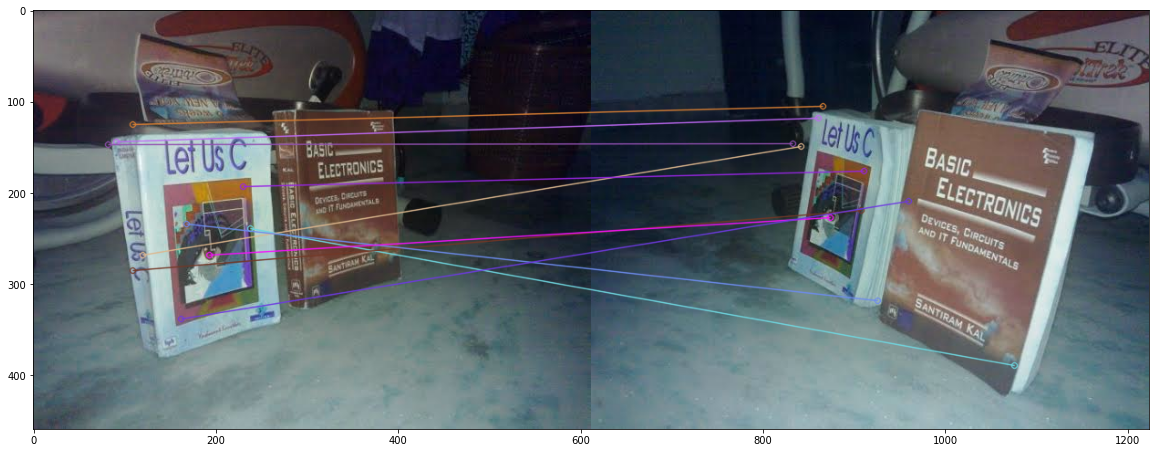

In [ ]:
print("Brute-Force Matching with ORB Descriptors")
_bruteForceMatching('left.jpg', 'right.jpg', opt = 0)
print("-----------------------------------------------")
print("Brute-Force Matching with BRIEF Descriptors")
_bruteForceMatching('left.jpg', 'right.jpg', opt = 1)

-Flann

In [ ]:
def _Flann(img1, img2, opt = 0): 
  img1 = cv.imread(img1, cv.IMREAD_COLOR) # queryImage
  img2 = cv.imread(img2, cv.IMREAD_COLOR) # trainImage
  
  if opt == 0:
    # Initiate ORB detector
    orb = cv.ORB_create()
    # find the keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)
  else: 
    # Initiate Brief detector
    start = cv.xfeatures2d.StarDetector_create()
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

    kp1 = start.detect(img1, None)
    kp1, des1 = brief.compute(img1, kp1)

    kp2 = start.detect(img2, None)
    kp2, des2 = brief.compute(img2, kp2)

  FLANN_INDEX_KDTREE = 1

  des1 = np.float32(des1)
  des2 = np.float32(des2)

  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary
  flann = cv.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  # Need to draw only good matches, so create a mask
  matchesMask = [[0,0] for i in range(len(matches))]
  # ratio test as per Lowe's paper
  for i,(m,n) in enumerate(matches):
      if m.distance < 0.7*n.distance:
          matchesMask[i]=[1,0]
  draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)
  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
  plt.figure(figsize=(20, 20))
  plt.imshow(img3,),plt.show()

FLANN with ORB Descriptors


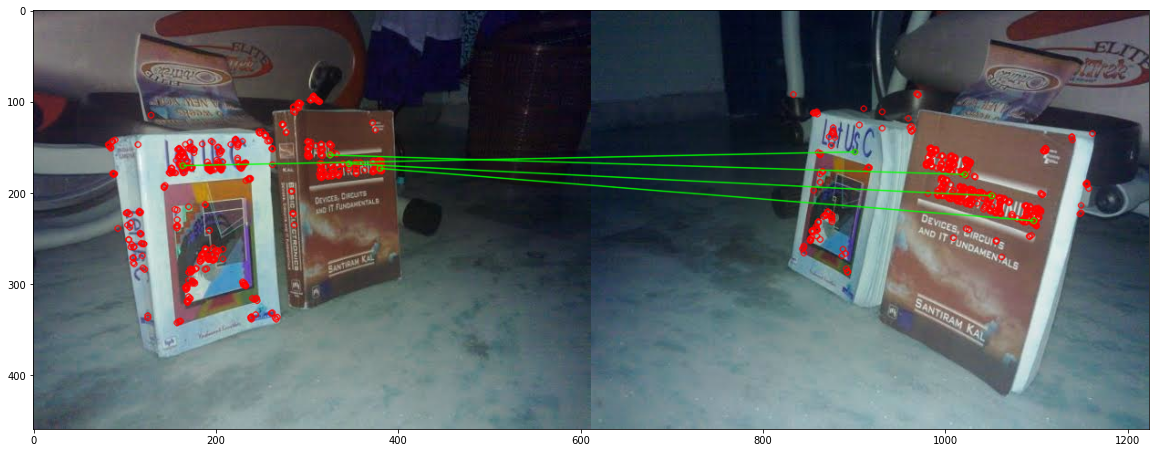

-----------------------------------------------
FLANN with BRIEF Descriptors


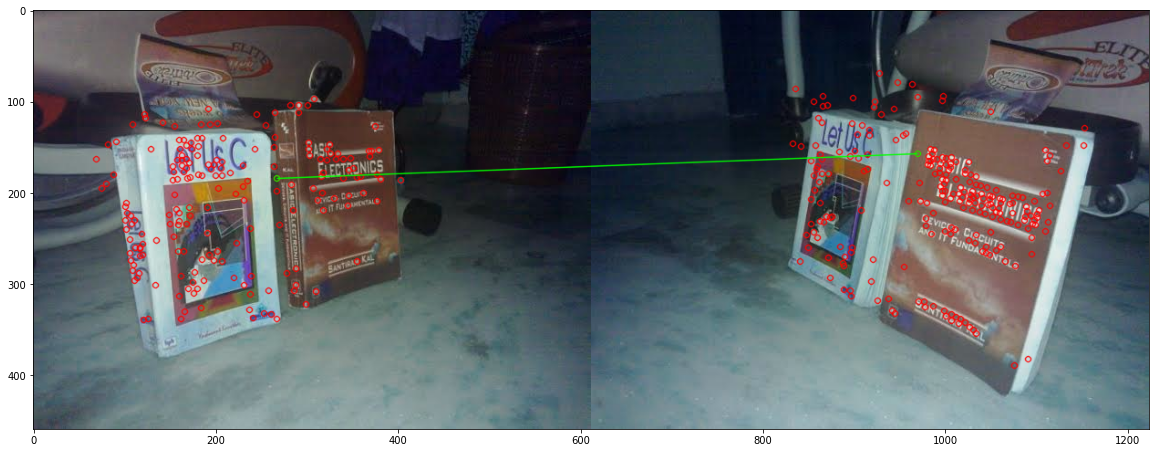

In [ ]:
print("FLANN with ORB Descriptors")
_Flann('left.jpg', 'right.jpg', opt = 0)
print("-----------------------------------------------")
print("FLANN with BRIEF Descriptors")
_Flann('left.jpg', 'right.jpg', opt = 1)